In [1]:
import pandas as pd      # For loading data and analysis
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt  

plt.style.use('fivethirtyeight')  # For additional style

In [2]:
# Loading data
df = pd.read_csv('Churn_Modelling.csv', index_col=0)

In [3]:
# Showing first 5 rows. For general view of the data
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Checking data shape (rows, columns)
df.shape

(10000, 13)

In [5]:
# Overall summary of each column.
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
#Sum of the data points that have null points. Zero value indicate no null values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Detail overview of each column. Values like min/max, count, mean, etc.
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


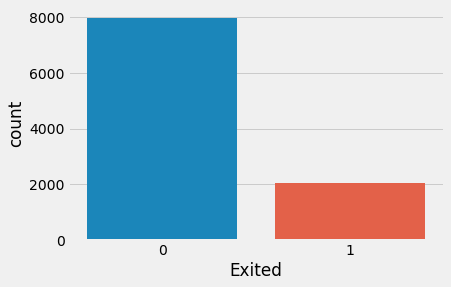

In [8]:
sns.countplot(df['Exited'])       # This is a problem of unbalances class.

In [9]:
# For Unique Values 
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
# Total number of values each unique value have
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

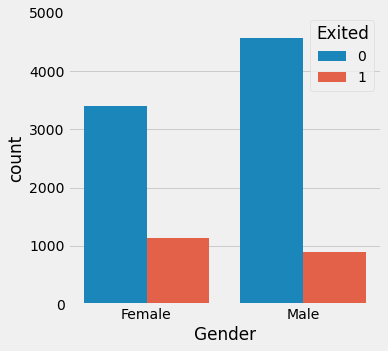

In [11]:
# Exit on basis of gender

plt.figure(figsize=(5,5))  # For increasing graph size for better comparison
plt.ylim(0, 5000)   # for y axis intervals (smalles, largest)
sns.countplot(df['Gender'],hue=df['Exited'])

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

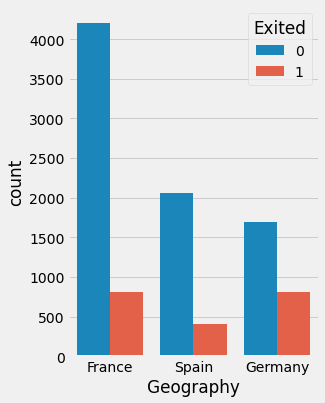

In [13]:
# Exit comparison in different countries

plt.figure(figsize=(4,6))
#plt.ylim(0, 3000)
sns.countplot(df['Geography'],hue=df['Exited'])

In [14]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [15]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

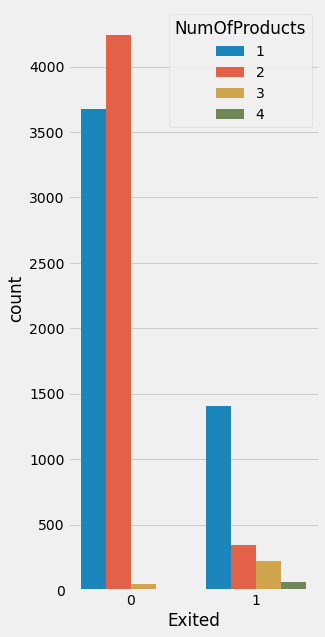

In [16]:
plt.figure(figsize=(4,10))
sns.countplot(df['Exited'],hue=df['NumOfProducts'])

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         422.,  233.]),
 array([350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]),
 <a list of 11 Patch objects>)

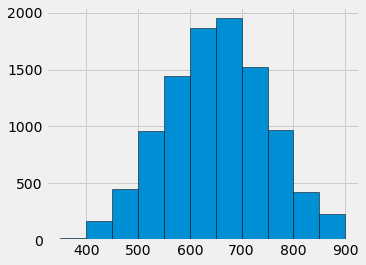

In [17]:
bins = [350,400,450,500,550,600,650,700,750,800,850,900] # For custom x axis intervals
plt.figure(figsize=(5,4))
plt.hist(df['CreditScore'], bins=bins, edgecolor="black")

In [18]:
# Correlation among different columns
ct = df.corr() 

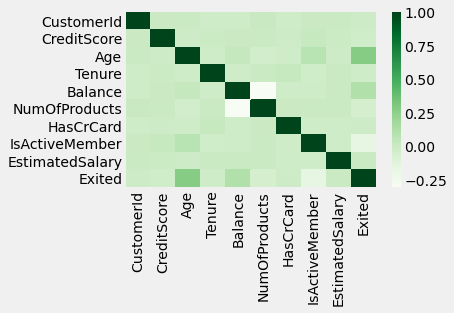

In [19]:
plt.figure(figsize=(5,3))
sns.heatmap(ct, cmap='Greens')

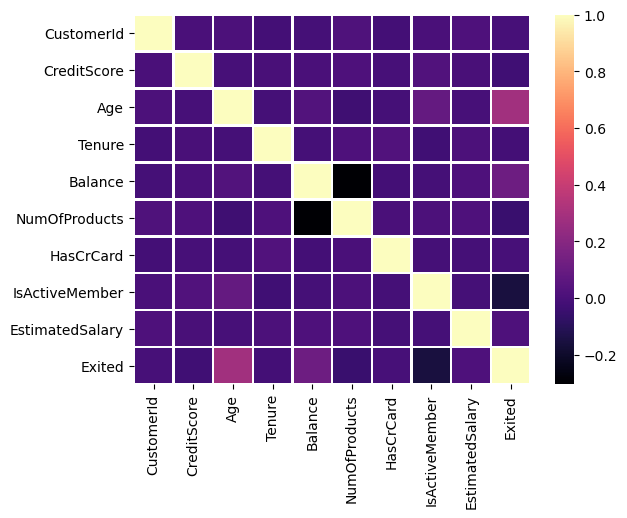

In [20]:
plt.style.use('default')      # For default style
sns.heatmap(ct, cmap='magma', linecolor='white', linewidths=1)

In [21]:
plt.style.use('fivethirtyeight')    # Reactivating custom style

In [22]:
# Correlation between Age and Exit
df[['Age', 'Exited']].corr()

,Age,Exited
Age,1.000000,0.285323
Exited,0.285323,1.000000


In [23]:
# Correlation between Age and Exit
df[['Age', 'Exited']].corr()

,Age,Exited
Age,1.000000,0.285323
Exited,0.285323,1.000000


(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         422.,  233.]),
 array([350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]),
 <a list of 11 Patch objects>)

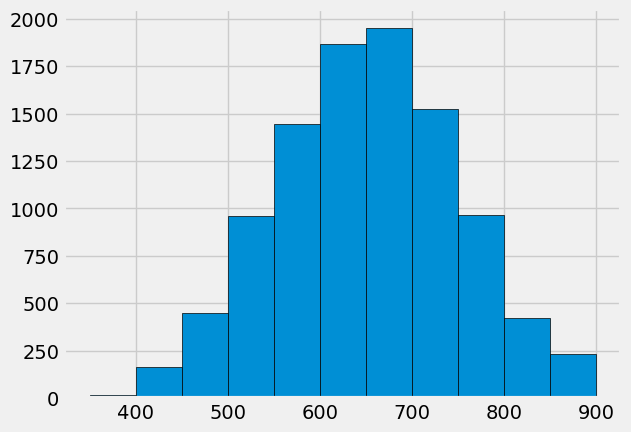

In [24]:
plt.hist(df['CreditScore'], bins=[350,400,450,500,550,600,650,700,750,800,850,900], edgecolor="black")
#sns.countplot(df['Exited'])

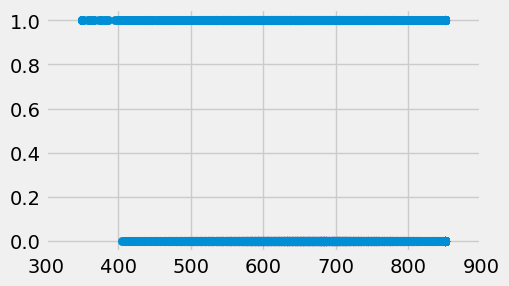

In [25]:
plt.figure(figsize=(5,3))
plt.xlim(300,900)
plt.scatter(x=df['CreditScore'], y=df['Exited'] )

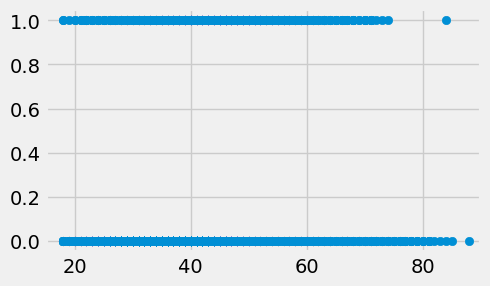

In [26]:
plt.figure(figsize=(5,3))
plt.xlim(15,90) 
plt.scatter(df['Age'], df['Exited'] )

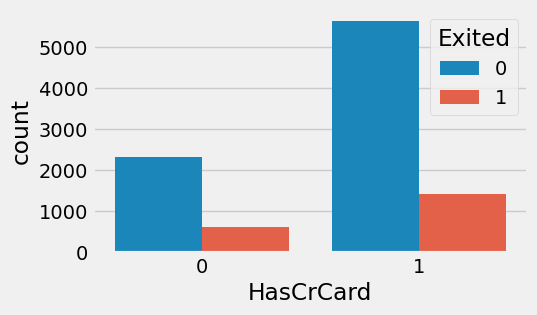

In [27]:
plt.figure(figsize=(5,3))
sns.countplot(df['HasCrCard'],hue=df['Exited'])

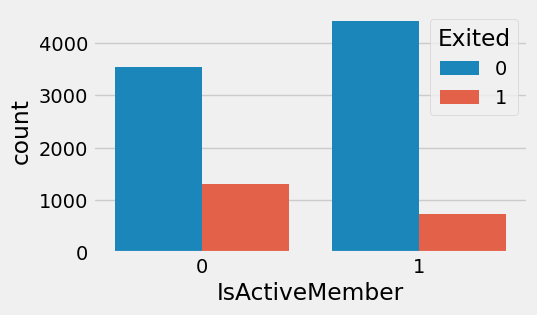

In [28]:
plt.figure(figsize=(5,3))
sns.countplot(df['IsActiveMember'],hue=df['Exited'])